# Основные понятия машинного обучения

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
* http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
* https://contrib.scikit-learn.org/category_encoders/
* https://scikit-learn.org/stable/modules/model_evaluation.html
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
* http://scikit-learn.org/stable/modules/cross_validation.html
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

## Задачи для совместного разбора

1\. Загрузите набор данных из файла `possum.csv` в виде `pd.DataFrame`. Решите задачу классификации по столбцу `sex`.

In [ ]:
!pip install category_encoders

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("possum.csv").drop(columns=["case"]).fillna(0)
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["sex"]),
    df["sex"],
    train_size=0.8,
    random_state=42,
)

In [ ]:
# pop = X_train["Pop"]
# tr = ce.OrdinalEncoder().fit(pop)
# tr.transform(pop)


In [ ]:
tr = ColumnTransformer(
    [
        ("anton", ce.OrdinalEncoder(), ["Pop"]),
        ("site", OneHotEncoder(), ["site"])
    ],

).fit(X_train)

In [ ]:
X_train_t = tr.transform(X_train)
# tr.fit(X_test) -- так нельзя!
X_test_t = tr.transform(X_test)

In [ ]:
map = {"m": 0, "f": 1}
y_train_t = y_train.map(map)
y_test_t = y_test.map(map)

In [ ]:
model = RandomForestClassifier(random_state=42).fit(X_train_t, y_train_t)
# model = SVMClassifier(random_state=42).fit(X_train_t, y_train_t)

In [ ]:
# model.score(X_val_t, y_val_t)

In [ ]:
model.score(X_train_t, y_train_t), model.score(X_test_t, y_test_t)

(1.0, 0.7142857142857143)

2\. Проверьте качество обучения модели с использованием перекрестной проверки

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(
    RandomForestClassifier(random_state=42),
    X_train_t,
    y_train_t,
    cv=5,
)

array([0.76470588, 0.41176471, 0.52941176, 0.5       , 0.625     ])

3\. Найдите оптимальные гиперпараметры модели, используя поиск по сетке.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid={
        "n_estimators": [50, 100, 150, 200],
        "max_depth": [None, 1, 2, 3],
    }
).fit(X_train_t, y_train_t)

In [ ]:
grid.best_params_, grid.best_score_

({'max_depth': 3, 'n_estimators': 150}, 0.6014705882352941)

In [ ]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [ ]:
@np.vectorize
def get_day(s: str) -> int:
  return int(s[:2])

In [ ]:
f = FunctionTransformer(get_day)
x = ["123456", "123465456"]
f.transform(x)

array([12, 12])

## Задачи для самостоятельного решения

In [ ]:
import pandas as pd
from sklearn. model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler

<p class="task" id="1"></p>

1\. Загрузите набор данных из файла `Walmart.csv` в виде `pd.DataFrame`. Преобразуйте столбец `Temperature` в числовой. Преобразуйте столбец `IsHoliday` в числовой столбец, содержащий значения 0 и 1, предварительно проанализировав значения в этом столбце.

In [ ]:
df = pd.read_csv('Walmart.csv').fillna(0)
df.head()

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,StoreId,IsHoliday
0,05-02-2010,1643690.90,42.31°C,2.572,211.096358,8.106,c4ca4238a0b923820dcc509a6f75849b,0
1,12-02-2010,1641957.44,38.51°C,2.548,211.242170,8.106,c4ca4238a0b923820dcc509a6f75849b,Y
2,19-02-2010,1611968.17,39.93°C,2.514,211.289143,8.106,c4ca4238a0b923820dcc509a6f75849b,N
3,26-02-2010,1409727.59,46.63°C,2.561,211.319643,8.106,c4ca4238a0b923820dcc509a6f75849b,n
4,05-03-2010,1554806.68,46.5°C,2.625,211.350143,8.106,c4ca4238a0b923820dcc509a6f75849b,0


In [ ]:
df = df.drop(['Date'], axis = 1); df.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,StoreId,IsHoliday
0,1643690.90,42.31°C,2.572,211.096358,8.106,c4ca4238a0b923820dcc509a6f75849b,0
1,1641957.44,38.51°C,2.548,211.242170,8.106,c4ca4238a0b923820dcc509a6f75849b,Y
2,1611968.17,39.93°C,2.514,211.289143,8.106,c4ca4238a0b923820dcc509a6f75849b,N
3,1409727.59,46.63°C,2.561,211.319643,8.106,c4ca4238a0b923820dcc509a6f75849b,n
4,1554806.68,46.5°C,2.625,211.350143,8.106,c4ca4238a0b923820dcc509a6f75849b,0


> ```Temperature```

In [ ]:
df.Temperature = df.Temperature.apply(lambda x: float(x[:len(x)-2]))
df.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,StoreId,IsHoliday
0,1643690.90,42.31,2.572,211.096358,8.106,c4ca4238a0b923820dcc509a6f75849b,0
1,1641957.44,38.51,2.548,211.242170,8.106,c4ca4238a0b923820dcc509a6f75849b,Y
2,1611968.17,39.93,2.514,211.289143,8.106,c4ca4238a0b923820dcc509a6f75849b,N
3,1409727.59,46.63,2.561,211.319643,8.106,c4ca4238a0b923820dcc509a6f75849b,n
4,1554806.68,46.50,2.625,211.350143,8.106,c4ca4238a0b923820dcc509a6f75849b,0


In [ ]:
df.dtypes

Weekly_Sales    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
StoreId          object
IsHoliday        object
dtype: object

> ```IsHoliday```

In [ ]:
df.IsHoliday.unique()

array(['0', 'Y', 'N', 'n', '-', 'no', 'No', 'y', 'Yes', '1', 'yes'],
      dtype=object)

In [ ]:
map = {'0':0, 'Y':1, 'N':0, 'n':0, '-':0, 'no':0, 'No':0, 'y':1, 'Yes':1, '1':1, 'yes':1}
df.IsHoliday = df.IsHoliday.map(map)

In [ ]:
df.dtypes

Weekly_Sales    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
StoreId          object
IsHoliday         int64
dtype: object

In [ ]:
df.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,StoreId,IsHoliday
0,1643690.90,42.31,2.572,211.096358,8.106,c4ca4238a0b923820dcc509a6f75849b,0
1,1641957.44,38.51,2.548,211.242170,8.106,c4ca4238a0b923820dcc509a6f75849b,1
2,1611968.17,39.93,2.514,211.289143,8.106,c4ca4238a0b923820dcc509a6f75849b,0
3,1409727.59,46.63,2.561,211.319643,8.106,c4ca4238a0b923820dcc509a6f75849b,0
4,1554806.68,46.50,2.625,211.350143,8.106,c4ca4238a0b923820dcc509a6f75849b,0


<p class="task" id="2"></p>

2\. Разбейте набор данных на обучающую и тестовую выборку в соотношении 70 на 30 для решения задачи регрессии. Создайте несколько версий обучающей и тестовой выборки выбрав различные алгоритмы препроцессинга данных: кодирования нечисловой информации, масшабирования признаков и т.д. Обратите внимание, что все энкодеры должны настраиваться только на основе обучающей выборки, расчет статистик для масштабирования должен проводиться только на основе обучающей выборки и т.д.

> разбиение на тест трейн

In [ ]:
X_train, X_test = train_test_split(
    df,
    test_size = 0.3,
    random_state = 42
)

In [ ]:
# X_train.shape

1 версия -- ```OneHotEncoder```, ```StandardScalerScaler```\
2 версия -- ```BinaryEncoder```, ```MinMaxScaler```

In [ ]:
# 1ая версия датасета


tr1 = ColumnTransformer(
    [
        ("encoder", OneHotEncoder(), ["StoreId"]),
    ],
    remainder=StandardScaler()
).fit(X_train)

In [ ]:
X_train_1 = pd.DataFrame(tr1.transform(X_train).toarray())
X_test_1 = pd.DataFrame(tr1.transform(X_test).toarray())

In [ ]:
X_train_1.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.012817,-0.567131,-1.165268,-1.151924,0.938433,3.684569
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.232932,0.259173,1.157092,1.361419,-1.238631,-0.271402
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1.302789,0.265141,-1.208963,1.003828,-0.819842,-0.271402
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.077747,-0.188431,1.069703,-0.928323,-0.098949,-0.271402
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.588147,1.414805,0.604357,1.380970,-0.889640,-0.271402


In [ ]:
X_train.drop(['StoreId'], axis = 1).columns, X_train_1.loc[:,45:].columns

(Index(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
        'IsHoliday'],
       dtype='object'),
 RangeIndex(start=45, stop=51, step=1))

In [ ]:
X_train_1 = X_train_1.rename(columns = {i:X_train.drop(['StoreId'], axis = 1).columns[i-45] for i in X_train_1.loc[:,45:].columns})
X_test_1 = X_test_1.rename(columns = {i:X_test.drop(['StoreId'], axis = 1).columns[i-45] for i in X_test_1.loc[:,45:].columns})
X_train_1.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.012817,-0.567131,-1.165268,-1.151924,0.938433,3.684569
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.232932,0.259173,1.157092,1.361419,-1.238631,-0.271402
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1.302789,0.265141,-1.208963,1.003828,-0.819842,-0.271402
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.077747,-0.188431,1.069703,-0.928323,-0.098949,-0.271402
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.588147,1.414805,0.604357,1.380970,-0.889640,-0.271402


In [ ]:
# 2ая версия датасета
from category_encoders.binary import BinaryEncoder

tr2 = ColumnTransformer(
    [
        ("encoder", BinaryEncoder(), ["StoreId"]),
    ],
    remainder=MinMaxScaler()
).fit(X_train)

In [ ]:
X_train_2 = pd.DataFrame(tr2.transform(X_train))
X_test_2 = pd.DataFrame(tr2.transform(X_test))

In [ ]:
X_train_2 = X_train_2.rename(columns = {i:X_train.drop(['StoreId'], axis = 1).columns[i-6] for i in X_train_2.loc[:,6:].columns})
X_test_2 = X_test_2.rename(columns = {i:X_train.drop(['StoreId'], axis = 1).columns[i-6] for i in X_test_2.loc[:,6:].columns})
X_train_2.head()

,0,1,2,3,4,5,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,0.0,0.0,0.0,0.0,0.0,1.0,0.555525,0.509002,0.160696,0.004273,0.564117,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.197793,0.658023,0.704708,0.978548,0.172513,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.027372,0.659100,0.150461,0.839931,0.247844,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.222513,0.577299,0.684237,0.090950,0.377516,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.328585,0.866438,0.575230,0.986127,0.235288,0.0


In [ ]:
X_train_1.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.012817,-0.567131,-1.165268,-1.151924,0.938433,3.684569
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.232932,0.259173,1.157092,1.361419,-1.238631,-0.271402
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1.302789,0.265141,-1.208963,1.003828,-0.819842,-0.271402
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.077747,-0.188431,1.069703,-0.928323,-0.098949,-0.271402
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.588147,1.414805,0.604357,1.380970,-0.889640,-0.271402


In [ ]:
X_train_1.columns = X_train_1.columns.astype(str)
X_train_2.columns = X_train_2.columns.astype(str)
X_test_1.columns = X_test_1.columns.astype(str)
X_test_2.columns = X_test_2.columns.astype(str)

<p class="task" id="3"></p>

3\. Решите задачу предсказания столбца `Weekly_Sales` с использованием пакета `sklearn`. Продемонстрируйте несколько различных моделей и значения основных регрессионных метрик (MAE, MSE, RMSE, MAPE). Представьте результат в виде таблицы, где по строкам расположены различные модели (дайте моделям названия и укажите их в качестве индекса), а по столбцам расположены версии датасетов и метрики на обучающем и тестовом множестве (двойной индекс по колонкам). Отсортируйте таблицу по убыванию значений любой выбранной вами метрики на тестовом множестве.   

In [ ]:
y_train_1, y_test_1 = train_test_split(
    pd.concat((X_train_1, X_test_1), axis=0).Weekly_Sales,
    test_size = 0.3,
    random_state = 42
)

In [ ]:
y_train_1.shape, X_train_1.shape

((4504,), (4504, 51))

In [ ]:
y_train_2, y_test_2 = train_test_split(
    pd.concat((X_train_2, X_test_2), axis=0).Weekly_Sales,
    test_size = 0.3,
    random_state = 42
)

In [ ]:
X_train_1 = X_train_1.drop(['Weekly_Sales'], axis = 1)
X_train_2 = X_train_2.drop(['Weekly_Sales'], axis = 1)
X_test_1 = X_test_1.drop(['Weekly_Sales'], axis = 1)
X_test_2 = X_test_2.drop(['Weekly_Sales'], axis = 1)

In [ ]:
metrics = pd.DataFrame(index =[['LinearRegression', 'LinearRegression', 'KNN','KNN', 'Ridge','Ridge', 'RandomForest','RandomForest'], [1,2,1,2,1,2,1,2]],
                       columns = ['MAE_test', 'MAE_train', 'MSE_test',  'MSE_train','RMSE_test', 'RMSE_train', 'MAPE_test', 'MAPE_train' ])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

> Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr1 = LinearRegression().fit(X_train_1, y_train_1)
lr2 = LinearRegression().fit(X_train_2, y_train_2)

In [ ]:
y_pred_1 = lr1.predict(X_test_1)
y_train_pred_1 = lr1.predict(X_train_1)

y_pred_2 = lr2.predict(X_test_2)
y_train_pred_2 = lr2.predict(X_train_2)


y_pred_1, y_pred_2  # точки регрессии

(array([ 0.03807108, -0.12517283, -0.01904987, ...,  0.21081619,
        -0.04473635,  0.03297363]),
 array([0.24193745, 0.24071358, 0.23813377, ..., 0.24307926, 0.23663081,
        0.24040044]))

In [ ]:
# средняя абсолютная ошибка
metrics['MAE_test']['LinearRegression'] = mean_absolute_error(y_true = y_test_1, y_pred=y_pred_1),  mean_absolute_error(y_true = y_test_2, y_pred=y_pred_2)
metrics['MAE_train']['LinearRegression'] = mean_absolute_error(y_true = y_train_1, y_pred=y_train_pred_1), mean_absolute_error(y_true = y_train_2, y_pred=y_train_pred_2)

In [ ]:
# среднеквадратичная ошибка
metrics['MSE_test']['LinearRegression'] = mean_squared_error(y_true = y_test_1, y_pred=y_pred_1), mean_squared_error(y_true = y_test_2, y_pred=y_pred_2)
metrics['MSE_train']['LinearRegression'] = mean_squared_error(y_true = y_train_1, y_pred=y_train_pred_1), mean_squared_error(y_true = y_train_2, y_pred=y_train_pred_2)

In [ ]:
# корень из среднеквадратичной ошибки
import math
metrics['RMSE_test']['LinearRegression'] = math.sqrt(mean_squared_error(y_true = y_test_1, y_pred=y_pred_1)), math.sqrt(mean_squared_error(y_true = y_test_2, y_pred=y_pred_2))
metrics['RMSE_train']['LinearRegression'] = math.sqrt(mean_squared_error(y_true = y_train_1, y_pred=y_train_pred_1)), math.sqrt(mean_squared_error(y_true = y_train_2, y_pred=y_train_pred_2))



In [ ]:
# средняя абс ошибка в процентах
metrics['MAPE_test']['LinearRegression'] = mean_absolute_percentage_error(y_true = y_test_1, y_pred=y_pred_1),  mean_absolute_percentage_error(y_true = y_test_2, y_pred=y_pred_2)
metrics['MAPE_train']['LinearRegression'] = mean_absolute_percentage_error(y_true = y_train_1, y_pred=y_train_pred_1), mean_absolute_percentage_error(y_true = y_train_2, y_pred=y_train_pred_2)

In [ ]:
# metrics

> Метод ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn1 = KNeighborsRegressor().fit(X_train_1, y_train_1)
knn2 = KNeighborsRegressor().fit(X_train_2, y_train_2)

In [ ]:
y_pred_1 = knn1.predict(X_test_1)
y_train_pred_1 = knn1.predict(X_train_1)

y_pred_2 = knn2.predict(X_test_2)
y_train_pred_2 = knn2.predict(X_train_2)

y_pred_1, y_pred_2  # точки регрессии

(array([ 0.06606005, -0.08571609, -0.73000083, ...,  0.02201582,
        -0.2611755 ,  0.5857017 ]),
 array([0.19501793, 0.22124342, 0.11861341, ..., 0.23840436, 0.19329398,
        0.34251697]))

In [ ]:
# средняя абсолютная ошибка
metrics['MAE_test']['KNN'] = mean_absolute_error(y_true = y_test_1, y_pred=y_pred_1),  mean_absolute_error(y_true = y_test_2, y_pred=y_pred_2)
metrics['MAE_train']['KNN'] = mean_absolute_error(y_true = y_train_1, y_pred=y_train_pred_1), mean_absolute_error(y_true = y_train_2, y_pred=y_train_pred_2)

In [ ]:
# среднеквадратичная ошибка
metrics['MSE_test']['KNN'] = mean_squared_error(y_true = y_test_1, y_pred=y_pred_1),  mean_squared_error(y_true = y_test_2, y_pred=y_pred_2)
metrics['MSE_train']['KNN'] = mean_squared_error(y_true = y_train_1, y_pred=y_train_pred_1), mean_squared_error(y_true = y_train_2, y_pred=y_train_pred_2)


In [ ]:
# корень из среднеквадратичной ошибки
import math
metrics['RMSE_test']['KNN'] = math.sqrt(mean_squared_error(y_true = y_test_1, y_pred=y_pred_1)), math.sqrt(mean_squared_error(y_true = y_test_2, y_pred=y_pred_2))
metrics['RMSE_train']['KNN'] = math.sqrt(mean_squared_error(y_true = y_train_1, y_pred=y_train_pred_1)),  math.sqrt(mean_squared_error(y_true = y_train_2, y_pred=y_train_pred_2))


In [ ]:
# средняя абс ошибка в процентах
metrics['MAPE_test']['KNN'] = mean_absolute_percentage_error(y_true = y_test_1, y_pred=y_pred_1), mean_absolute_percentage_error(y_true = y_test_2, y_pred=y_pred_2)
metrics['MAPE_train']['KNN'] = mean_absolute_percentage_error(y_true = y_train_1, y_pred=y_train_pred_1), mean_absolute_percentage_error(y_true = y_train_2, y_pred=y_train_pred_2)


In [ ]:
# metrics

> гребневая регрессия

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rd1 = Ridge().fit(X_train_1, y_train_1)
rd2 = Ridge().fit(X_train_2, y_train_2)

In [ ]:
y_pred_1 = rd1.predict(X_test_1)
y_train_pred_1 = rd1.predict(X_train_1)

y_pred_2 = rd2.predict(X_test_2)
y_train_pred_2 = rd2.predict(X_train_2)

y_pred_1, y_pred_2  # точки регрессии

(array([ 0.03639745, -0.1150313 , -0.021454  , ...,  0.20972827,
        -0.03252326,  0.03951223]),
 array([0.2419053 , 0.24073416, 0.23812245, ..., 0.24304886, 0.2366364 ,
        0.24038909]))

In [ ]:
# средняя абсолютная ошибка
metrics['MAE_test']['Ridge'] = mean_absolute_error(y_true = y_test_1, y_pred=y_pred_1), mean_absolute_error(y_true = y_test_2, y_pred=y_pred_2)
metrics['MAE_train']['Ridge'] = mean_absolute_error(y_true = y_train_1, y_pred=y_train_pred_1), mean_absolute_error(y_true = y_train_2, y_pred=y_train_pred_2)


In [ ]:
# среднеквадратичная ошибка
metrics['MSE_test']['Ridge'] = mean_squared_error(y_true = y_test_1, y_pred=y_pred_1), mean_squared_error(y_true = y_test_2, y_pred=y_pred_2)
metrics['MSE_train']['Ridge'] = mean_squared_error(y_true = y_train_1, y_pred=y_train_pred_1),  mean_squared_error(y_true = y_train_2, y_pred=y_train_pred_2)


In [ ]:
# корень из среднеквадратичной ошибки
import math
metrics['RMSE_test']['Ridge'] = math.sqrt(mean_squared_error(y_true = y_test_1, y_pred=y_pred_1)), math.sqrt(mean_squared_error(y_true = y_test_2, y_pred=y_pred_2))
metrics['RMSE_train']['Ridge'] = math.sqrt(mean_squared_error(y_true = y_train_1, y_pred=y_train_pred_1)), math.sqrt(mean_squared_error(y_true = y_train_2, y_pred=y_train_pred_2))


In [ ]:
# средняя абс ошибка в процентах
metrics['MAPE_test']['Ridge'] = mean_absolute_percentage_error(y_true = y_test_1, y_pred=y_pred_1), mean_absolute_percentage_error(y_true = y_test_2, y_pred=y_pred_2)
metrics['MAPE_train']['Ridge'] = mean_absolute_percentage_error(y_true = y_train_1, y_pred=y_train_pred_1),  mean_absolute_percentage_error(y_true = y_train_2, y_pred=y_train_pred_2)


In [ ]:
# metrics

> Рандомный лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf1 = Ridge().fit(X_train_1, y_train_1)
rf2 = Ridge().fit(X_train_2, y_train_2)

In [ ]:
y_pred_1 = rf1.predict(X_test_1)
y_train_pred_1 = rf1.predict(X_train_1)

y_pred_2 = rf2.predict(X_test_2)
y_train_pred_2 = rf2.predict(X_train_2)

y_pred_1, y_pred_2  # точки регрессии

(array([ 0.03639745, -0.1150313 , -0.021454  , ...,  0.20972827,
        -0.03252326,  0.03951223]),
 array([0.2419053 , 0.24073416, 0.23812245, ..., 0.24304886, 0.2366364 ,
        0.24038909]))

In [ ]:
# средняя абсолютная ошибка
metrics['MAE_test']['RandomForest'] = mean_absolute_error(y_true = y_test_1, y_pred=y_pred_1),  mean_absolute_error(y_true = y_test_2, y_pred=y_pred_2)
metrics['MAE_train']['RandomForest'] = mean_absolute_error(y_true = y_train_1, y_pred=y_train_pred_1), mean_absolute_error(y_true = y_train_2, y_pred=y_train_pred_2)

In [ ]:
# среднеквадратичная ошибка
metrics['MSE_test']['RandomForest'] = mean_squared_error(y_true = y_test_1, y_pred=y_pred_1), mean_squared_error(y_true = y_test_2, y_pred=y_pred_2)
metrics['MSE_train']['RandomForest'] = mean_squared_error(y_true = y_train_1, y_pred=y_train_pred_1), mean_squared_error(y_true = y_train_2, y_pred=y_train_pred_2)

In [ ]:
# корень из среднеквадратичной ошибки
import math
metrics['RMSE_test']['RandomForest'] = math.sqrt(mean_squared_error(y_true = y_test_1, y_pred=y_pred_1)), math.sqrt(mean_squared_error(y_true = y_test_2, y_pred=y_pred_2))
metrics['RMSE_train']['RandomForest'] = math.sqrt(mean_squared_error(y_true = y_train_1, y_pred=y_train_pred_1)), math.sqrt(mean_squared_error(y_true = y_train_2, y_pred=y_train_pred_2))


In [ ]:
# средняя абс ошибка в процентах
metrics['MAPE_test']['RandomForest'] = mean_absolute_percentage_error(y_true = y_test_1, y_pred=y_pred_1), mean_absolute_percentage_error(y_true = y_test_2, y_pred=y_pred_2)
metrics['MAPE_train']['RandomForest'] = mean_absolute_percentage_error(y_true = y_train_1, y_pred=y_train_pred_1), mean_absolute_percentage_error(y_true = y_train_2, y_pred=y_train_pred_2)


In [ ]:
metrics

MAE_test MAE_train  MSE_test MSE_train RMSE_test  \
LinearRegression 1  0.850173   0.82237  1.023435  0.988021   1.01165   
                 2  0.135436  0.131725  0.025882  0.025267  0.160878   
KNN              1  0.906948  0.730372  1.218582  0.808051  1.103894   
                 2  0.143956  0.116536  0.030824  0.020529  0.175568   
Ridge            1  0.849866  0.822457  1.022875   0.98811  1.011373   
                 2  0.135434  0.131725  0.025881  0.025267  0.160877   
RandomForest     1  0.849866  0.822457  1.022875   0.98811  1.011373   
                 2  0.135434  0.131725  0.025881  0.025267  0.160877   

                   RMSE_train            MAPE_test MAPE_train  
LinearRegression 1   0.993993             1.882272   1.169805  
                 2   0.158956  588034155834.640503   1.701279  
KNN              1   0.898917             5.169283   2.203865  
                 2   0.143278  569965102489.267822   1.468782  
Ridge            1   0.994037              1.89552   1.172389  
                 2   0.158956  587823493383.352417   1.701271  
RandomForest     1   0.994037              1.89552   1.172389  
                 2   0.158956  587823493383.352417   1.701271

In [ ]:
# сортировка по убыванию по метрике MAPE

metrics.sort_values(by = ['MAE_test', 'MAE_train'], ascending=False)

,,MAE_test,MAE_train,MSE_test,MSE_train,RMSE_test,RMSE_train,MAPE_test,MAPE_train
KNN,1,0.906948,0.730372,1.218582,0.808051,1.103894,0.898917,5.169283,2.203865
LinearRegression,1,0.850173,0.82237,1.023435,0.988021,1.01165,0.993993,1.882272,1.169805
Ridge,1,0.849866,0.822457,1.022875,0.98811,1.011373,0.994037,1.89552,1.172389
RandomForest,1,0.849866,0.822457,1.022875,0.98811,1.011373,0.994037,1.89552,1.172389
KNN,2,0.143956,0.116536,0.030824,0.020529,0.175568,0.143278,569965102489.267822,1.468782
LinearRegression,2,0.135436,0.131725,0.025882,0.025267,0.160878,0.158956,588034155834.640503,1.701279
Ridge,2,0.135434,0.131725,0.025881,0.025267,0.160877,0.158956,587823493383.352417,1.701271
RandomForest,2,0.135434,0.131725,0.025881,0.025267,0.160877,0.158956,587823493383.352417,1.701271


<p class="task" id="4"></p>

4\. Повторите решение задачи 3, используя перекрестную проверку для оценки качества модели на обучающем множестве. При представлении результата в виде таблицы значения метрик указывайте в виде строки "среднее±ст.откл."

In [ ]:
 from sklearn.model_selection import cross_validate

In [ ]:
metrics = pd.DataFrame(index =[['LinearRegression', 'LinearRegression', 'KNN','KNN', 'Ridge','Ridge', 'RandomForest','RandomForest'], [1,2,1,2,1,2,1,2]],
                       columns = ['MAE_test', 'MAE_train', 'MSE_test',  'MSE_train','RMSE_test', 'RMSE_train', 'MAPE_test', 'MAPE_train' ])

> Линейная регрессия

In [ ]:
# 1ая версия датасета

scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error']
score_test_1 = cross_validate(
    LinearRegression(),
    X_test_1,
    y_test_1,
    cv=5,
    scoring = scoring
)

score_train_1 = cross_validate(
    LinearRegression(),
    X_train_1,
    y_train_1,
    cv=5,
    scoring = scoring
)
score_test_1

{'fit_time': array([0.01454687, 0.01308751, 0.01814628, 0.0123415 , 0.01928496]),
 'score_time': array([0.00932384, 0.00904489, 0.00580621, 0.00599718, 0.00563836]),
 'test_neg_mean_absolute_error': array([-0.8732486 , -0.8087206 , -0.81199326, -0.85156656, -0.87008923]),
 'test_neg_mean_squared_error': array([-1.1235127 , -0.92695156, -0.95968973, -1.06975678, -1.09495596]),
 'test_neg_root_mean_squared_error': array([-1.05995882, -0.96278324, -0.97963755, -1.03429047, -1.04640143]),
 'test_neg_mean_absolute_percentage_error': array([-1.96315296, -1.21010984, -1.11388617, -1.62513884, -2.41012333])}

In [ ]:
# вторая версия датасета

score_test_2 = cross_validate(
    LinearRegression(),
    X_test_2,
    y_test_2,
    cv=5,
    scoring = scoring
)

score_train_2 = cross_validate(
    LinearRegression(),
    X_train_2,
    y_train_2,
    cv=5,
    scoring = scoring
)
# score_test_2

In [ ]:
score_test_1['test_neg_mean_absolute_error'].mean(), score_test_1['test_neg_mean_absolute_error'].std()

(-0.8431236513504355, 0.027779880351561183)

In [ ]:
metrics['MAE_test']['LinearRegression'] = f'{score_test_1["test_neg_mean_absolute_error"].mean()} ± {score_test_1["test_neg_mean_absolute_error"].std()}', f'{score_test_2["test_neg_mean_absolute_error"].mean()} ±  {score_test_2["test_neg_mean_absolute_error"].std()}'
metrics['MAE_train']['LinearRegression'] = f'{score_train_1["test_neg_mean_absolute_error"].mean()} ± {score_train_1["test_neg_mean_absolute_error"].std()}', f'{score_train_2["test_neg_mean_absolute_error"].mean()} ±  {score_train_2["test_neg_mean_absolute_error"].std()}'

In [ ]:
metrics['MSE_test']['LinearRegression'] = f'{score_test_1["test_neg_mean_squared_error"].mean()} ± {score_test_1["test_neg_mean_squared_error"].std()}', f'{score_test_2["test_neg_mean_squared_error"].mean()} ±  {score_test_2["test_neg_mean_squared_error"].std()}'
metrics['MSE_train']['LinearRegression'] = f'{score_train_1["test_neg_mean_squared_error"].mean()} ± {score_train_1["test_neg_mean_squared_error"].std()}', f'{score_train_2["test_neg_mean_squared_error"].mean()} ±  {score_train_2["test_neg_mean_squared_error"].std()}'

In [ ]:
metrics['RMSE_test']['LinearRegression'] = f'{score_test_1["test_neg_root_mean_squared_error"].mean()} ± {score_test_1["test_neg_root_mean_squared_error"].std()}', f'{score_test_2["test_neg_root_mean_squared_error"].mean()} ±  {score_test_2["test_neg_root_mean_squared_error"].std()}'
metrics['RMSE_train']['LinearRegression'] = f'{score_train_1["test_neg_root_mean_squared_error"].mean()} ± {score_train_1["test_neg_root_mean_squared_error"].std()}', f'{score_train_2["test_neg_root_mean_squared_error"].mean()} ±  {score_train_2["test_neg_root_mean_squared_error"].std()}'

In [ ]:
metrics['MAPE_test']['LinearRegression'] = f'{score_test_1["test_neg_mean_absolute_percentage_error"].mean()} ± {score_test_1["test_neg_mean_absolute_percentage_error"].std()}', f'{score_test_2["test_neg_mean_absolute_percentage_error"].mean()} ±  {score_test_2["test_neg_mean_absolute_percentage_error"].std()}'
metrics['MAPE_train']['LinearRegression'] = f'{score_train_1["test_neg_mean_absolute_percentage_error"].mean()} ± {score_train_1["test_neg_mean_absolute_percentage_error"].std()}', f'{score_train_2["test_neg_mean_absolute_percentage_error"].mean()} ±  {score_train_2["test_neg_mean_absolute_percentage_error"].std()}'

In [ ]:
# metrics

> KNN

In [ ]:
# 1ая версия датасета

score_test_1 = cross_validate(
    KNeighborsRegressor(),
    X_test_1,
    y_test_1,
    cv=5,
    scoring = scoring
)

score_train_1 = cross_validate(
    KNeighborsRegressor(),
    X_train_1,
    y_train_1,
    cv=5,
    scoring = scoring
)
score_test_1

{'fit_time': array([0.00318241, 0.00220394, 0.00232315, 0.00189376, 0.00223231]),
 'score_time': array([0.01769686, 0.01695728, 0.00684047, 0.00841284, 0.00754952]),
 'test_neg_mean_absolute_error': array([-0.94229655, -0.88844477, -0.87979856, -0.91429569, -0.94480024]),
 'test_neg_mean_squared_error': array([-1.31454131, -1.13861511, -1.16917568, -1.26517474, -1.2884496 ]),
 'test_neg_root_mean_squared_error': array([-1.14653448, -1.0670591 , -1.08128427, -1.12479986, -1.13509894]),
 'test_neg_mean_absolute_percentage_error': array([-2.49132288, -1.61873002, -1.43705709, -2.21384925, -4.71504444])}

In [ ]:
# вторая версия датасета

score_test_2 = cross_validate(
    KNeighborsRegressor(),
    X_test_2,
    y_test_2,
    cv=5,
    scoring = scoring
)

score_train_2 = cross_validate(
    KNeighborsRegressor(),
    X_train_2,
    y_train_2,
    cv=5,
    scoring = scoring
)

In [ ]:
metrics['MAE_test']['KNN'] = f'{score_test_1["test_neg_mean_absolute_error"].mean()} ± {score_test_1["test_neg_mean_absolute_error"].std()}', f'{score_test_2["test_neg_mean_absolute_error"].mean()} ±  {score_test_2["test_neg_mean_absolute_error"].std()}'
metrics['MAE_train']['KNN'] = f'{score_train_1["test_neg_mean_absolute_error"].mean()} ± {score_train_1["test_neg_mean_absolute_error"].std()}', f'{score_train_2["test_neg_mean_absolute_error"].mean()} ±  {score_train_2["test_neg_mean_absolute_error"].std()}'

In [ ]:
metrics['MSE_test']['KNN'] = f'{score_test_1["test_neg_mean_squared_error"].mean()} ± {score_test_1["test_neg_mean_squared_error"].std()}', f'{score_test_2["test_neg_mean_squared_error"].mean()} ±  {score_test_2["test_neg_mean_squared_error"].std()}'
metrics['MSE_train']['KNN'] = f'{score_train_1["test_neg_mean_squared_error"].mean()} ± {score_train_1["test_neg_mean_squared_error"].std()}', f'{score_train_2["test_neg_mean_squared_error"].mean()} ±  {score_train_2["test_neg_mean_squared_error"].std()}'

In [ ]:
metrics['RMSE_test']['KNN'] = f'{score_test_1["test_neg_root_mean_squared_error"].mean()} ± {score_test_1["test_neg_root_mean_squared_error"].std()}', f'{score_test_2["test_neg_root_mean_squared_error"].mean()} ±  {score_test_2["test_neg_root_mean_squared_error"].std()}'
metrics['RMSE_train']['KNN'] = f'{score_train_1["test_neg_root_mean_squared_error"].mean()} ± {score_train_1["test_neg_root_mean_squared_error"].std()}', f'{score_train_2["test_neg_root_mean_squared_error"].mean()} ±  {score_train_2["test_neg_root_mean_squared_error"].std()}'

In [ ]:
metrics['MAPE_test']['KNN'] = f'{score_test_1["test_neg_mean_absolute_percentage_error"].mean()} ± {score_test_1["test_neg_mean_absolute_percentage_error"].std()}', f'{score_test_2["test_neg_mean_absolute_percentage_error"].mean()} ±  {score_test_2["test_neg_mean_absolute_percentage_error"].std()}'
metrics['MAPE_train']['KNN'] = f'{score_train_1["test_neg_mean_absolute_percentage_error"].mean()} ± {score_train_1["test_neg_mean_absolute_percentage_error"].std()}', f'{score_train_2["test_neg_mean_absolute_percentage_error"].mean()} ±  {score_train_2["test_neg_mean_absolute_percentage_error"].std()}'

In [ ]:
# metrics

> Гребневая регрессия

In [ ]:
# 1ая версия датасета

score_test_1 = cross_validate(
    Ridge(),
    X_test_1,
    y_test_1,
    cv=5,
    scoring = scoring
)

score_train_1 = cross_validate(
    Ridge(),
    X_train_1,
    y_train_1,
    cv=5,
    scoring = scoring
)
score_test_1

{'fit_time': array([0.00922418, 0.00312495, 0.00372386, 0.00499129, 0.0029881 ]),
 'score_time': array([0.00239539, 0.00230551, 0.00184059, 0.00381899, 0.00420403]),
 'test_neg_mean_absolute_error': array([-0.87176221, -0.80747202, -0.81260678, -0.8506232 , -0.86812759]),
 'test_neg_mean_squared_error': array([-1.11976472, -0.92190186, -0.95845402, -1.06658418, -1.09011269]),
 'test_neg_root_mean_squared_error': array([-1.05818936, -0.96015721, -0.97900665, -1.03275562, -1.04408462]),
 'test_neg_mean_absolute_percentage_error': array([-1.92632825, -1.20072347, -1.10937383, -1.60208452, -2.51174385])}

In [ ]:
# вторая версия датасета

score_test_2 = cross_validate(
    Ridge(),
    X_test_2,
    y_test_2,
    cv=5,
    scoring = scoring
)

score_train_2 = cross_validate(
    Ridge(),
    X_train_2,
    y_train_2,
    cv=5,
    scoring = scoring
)

In [ ]:
metrics['MAE_test']['Ridge'] = f'{score_test_1["test_neg_mean_absolute_error"].mean()} ± {score_test_1["test_neg_mean_absolute_error"].std()}', f'{score_test_2["test_neg_mean_absolute_error"].mean()} ±  {score_test_2["test_neg_mean_absolute_error"].std()}'
metrics['MAE_train']['Ridge'] = f'{score_train_1["test_neg_mean_absolute_error"].mean()} ± {score_train_1["test_neg_mean_absolute_error"].std()}', f'{score_train_2["test_neg_mean_absolute_error"].mean()} ±  {score_train_2["test_neg_mean_absolute_error"].std()}'

In [ ]:
metrics['MSE_test']['Ridge'] = f'{score_test_1["test_neg_mean_squared_error"].mean()} ± {score_test_1["test_neg_mean_squared_error"].std()}', f'{score_test_2["test_neg_mean_squared_error"].mean()} ±  {score_test_2["test_neg_mean_squared_error"].std()}'
metrics['MSE_train']['Ridge'] = f'{score_train_1["test_neg_mean_squared_error"].mean()} ± {score_train_1["test_neg_mean_squared_error"].std()}', f'{score_train_2["test_neg_mean_squared_error"].mean()} ±  {score_train_2["test_neg_mean_squared_error"].std()}'

In [ ]:
metrics['RMSE_test']['Ridge'] = f'{score_test_1["test_neg_root_mean_squared_error"].mean()} ± {score_test_1["test_neg_root_mean_squared_error"].std()}', f'{score_test_2["test_neg_root_mean_squared_error"].mean()} ±  {score_test_2["test_neg_root_mean_squared_error"].std()}'
metrics['RMSE_train']['Ridge'] = f'{score_train_1["test_neg_root_mean_squared_error"].mean()} ± {score_train_1["test_neg_root_mean_squared_error"].std()}', f'{score_train_2["test_neg_root_mean_squared_error"].mean()} ±  {score_train_2["test_neg_root_mean_squared_error"].std()}'

In [ ]:
metrics['MAPE_test']['Ridge'] = f'{score_test_1["test_neg_mean_absolute_percentage_error"].mean()} ± {score_test_1["test_neg_mean_absolute_percentage_error"].std()}', f'{score_test_2["test_neg_mean_absolute_percentage_error"].mean()} ±  {score_test_2["test_neg_mean_absolute_percentage_error"].std()}'
metrics['MAPE_train']['Ridge'] = f'{score_train_1["test_neg_mean_absolute_percentage_error"].mean()} ± {score_train_1["test_neg_mean_absolute_percentage_error"].std()}', f'{score_train_2["test_neg_mean_absolute_percentage_error"].mean()} ±  {score_train_2["test_neg_mean_absolute_percentage_error"].std()}'

In [ ]:
# metrics

> RandomForest

In [ ]:
# 1ая версия датасета

score_test_1 = cross_validate(
    RandomForestRegressor(),
    X_test_1,
    y_test_1,
    cv=5,
    scoring = scoring
)

score_train_1 = cross_validate(
    RandomForestRegressor(),
    X_train_1,
    y_train_1,
    cv=5,
    scoring = scoring
)
score_test_1

{'fit_time': array([0.84696579, 0.81825519, 0.78565335, 0.78170037, 0.79688191]),
 'score_time': array([0.01246285, 0.01177549, 0.01198363, 0.01277089, 0.01198149]),
 'test_neg_mean_absolute_error': array([-0.93275817, -0.86843977, -0.86925469, -0.91959658, -0.90098884]),
 'test_neg_mean_squared_error': array([-1.26065874, -1.08674292, -1.11783435, -1.23707631, -1.19602445]),
 'test_neg_root_mean_squared_error': array([-1.1227906 , -1.04246963, -1.05727686, -1.11223932, -1.09362903]),
 'test_neg_mean_absolute_percentage_error': array([-2.88050374, -1.59585795, -1.45824021, -1.82885736, -5.14058208])}

In [ ]:
# вторая версия датасета

score_test_2 = cross_validate(
    RandomForestRegressor(),
    X_test_2,
    y_test_2,
    cv=5,
    scoring = scoring
)

score_train_2 = cross_validate(
    RandomForestRegressor(),
    X_train_2,
    y_train_2,
    cv=5,
    scoring = scoring
)

In [ ]:
metrics['MAE_test']['RandomForest'] = f'{score_test_1["test_neg_mean_absolute_error"].mean()} ± {score_test_1["test_neg_mean_absolute_error"].std()}', f'{score_test_2["test_neg_mean_absolute_error"].mean()} ±  {score_test_2["test_neg_mean_absolute_error"].std()}'
metrics['MAE_train']['RandomForest'] = f'{score_train_1["test_neg_mean_absolute_error"].mean()} ± {score_train_1["test_neg_mean_absolute_error"].std()}', f'{score_train_2["test_neg_mean_absolute_error"].mean()} ±  {score_train_2["test_neg_mean_absolute_error"].std()}'

In [ ]:
metrics['MSE_test']['RandomForest'] = f'{score_test_1["test_neg_mean_squared_error"].mean()} ± {score_test_1["test_neg_mean_squared_error"].std()}', f'{score_test_2["test_neg_mean_squared_error"].mean()} ±  {score_test_2["test_neg_mean_squared_error"].std()}'
metrics['MSE_train']['RandomForest'] = f'{score_train_1["test_neg_mean_squared_error"].mean()} ± {score_train_1["test_neg_mean_squared_error"].std()}', f'{score_train_2["test_neg_mean_squared_error"].mean()} ±  {score_train_2["test_neg_mean_squared_error"].std()}'

In [ ]:
metrics['RMSE_test']['RandomForest'] = f'{score_test_1["test_neg_root_mean_squared_error"].mean()} ± {score_test_1["test_neg_root_mean_squared_error"].std()}', f'{score_test_2["test_neg_root_mean_squared_error"].mean()} ±  {score_test_2["test_neg_root_mean_squared_error"].std()}'
metrics['RMSE_train']['RandomForest'] = f'{score_train_1["test_neg_root_mean_squared_error"].mean()} ± {score_train_1["test_neg_root_mean_squared_error"].std()}', f'{score_train_2["test_neg_root_mean_squared_error"].mean()} ±  {score_train_2["test_neg_root_mean_squared_error"].std()}'

In [ ]:
metrics['MAPE_test']['RandomForest'] = f'{score_test_1["test_neg_mean_absolute_percentage_error"].mean()} ± {score_test_1["test_neg_mean_absolute_percentage_error"].std()}', f'{score_test_2["test_neg_mean_absolute_percentage_error"].mean()} ±  {score_test_2["test_neg_mean_absolute_percentage_error"].std()}'
metrics['MAPE_train']['RandomForest'] = f'{score_train_1["test_neg_mean_absolute_percentage_error"].mean()} ± {score_train_1["test_neg_mean_absolute_percentage_error"].std()}', f'{score_train_2["test_neg_mean_absolute_percentage_error"].mean()} ±  {score_train_2["test_neg_mean_absolute_percentage_error"].std()}'

In [ ]:
metrics

MAE_test  \
LinearRegression 1    -0.8431236513504355 ± 0.027779880351561183   
                 2  -0.13377152168932777 ±  0.004052690561627392   
KNN              1     -0.9139271633709647 ± 0.02672908168753619   
                 2  -0.14442335009239207 ±  0.003556013711076302   
Ridge            1    -0.8421183572250215 ± 0.027198795347846937   
                 2  -0.13376293523693947 ±  0.004051160844515699   
RandomForest     1     -0.8982076078706888 ± 0.02601292080889019   
                 2  -0.14223617300112862 ±  0.003729125926466309   

                                                        MAE_train  \
LinearRegression 1     -0.8352763265077572 ± 0.011380828682345134   
                 2   -0.1320730326178543 ±  0.0025286117038590336   
KNN              1     -0.8893556023150966 ± 0.016766329390219326   
                 2   -0.1418633944254984 ±  0.0024086906713156474   
Ridge            1     -0.8309072316812784 ± 0.015794133118095154   
                 2   -0.13207093061537423 ±  0.002526367893331641   
RandomForest     1     -0.8764153095498545 ± 0.010043339547188251   
                 2  -0.13999872907435917 ±  0.0011701081369681775   

                                                         MSE_test  \
LinearRegression 1       -1.0349733470310807 ± 0.0774381643871069   
                 2  -0.025726791490948586 ±  0.001866695338939436   
KNN              1      -1.2351912887170922 ± 0.06887219953358611   
                 2  -0.03100987270815834 ±  0.0015533299337405048   
Ridge            1      -1.0313634949394739 ± 0.07720671149041383   
                 2   -0.02572193977136763 ±  0.001865709305559646   
RandomForest     1      -1.1796673545062508 ± 0.06720300262074483   
                 2    -0.029351597765552 ±  0.0015327698304465412   

                                                         MSE_train  \
LinearRegression 1        -1.0260498688475006 ± 0.0394568710258482   
                 2  -0.025410324760648105 ±  0.0009654120578466996   
KNN              1       -1.1943514831851871 ± 0.04023369244272566   
                 2  -0.030224702883135925 ±  0.0007541044336020589   
Ridge            1      -1.0100494118856063 ± 0.036168537744730764   
                 2  -0.025409603849624006 ±  0.0009645144609265241   
RandomForest     1      -1.1291873266943004 ± 0.022373250057673433   
                 2  -0.028938937674648772 ±  0.0005292258237685272   

                                                       RMSE_test  \
LinearRegression 1     -1.0166143028903771 ± 0.03832370271506982   
                 2  -0.16028744936744324 ±  0.005892797826830747   
KNN              1    -1.1109553304918889 ± 0.031137475311112696   
                 2    -0.1760402917368968 ±  0.00443716050493943   
Ridge            1     -1.0148386919788261 ± 0.03828738959734972   
                 2  -0.16027241732770056 ±  0.005889992810098662   
RandomForest     1    -1.0856810872457459 ± 0.031047243084462158   
                 2   -0.1712642403685954 ±  0.004489736798519359   

                                                       RMSE_train  \
LinearRegression 1      -1.012753368945686 ± 0.019505961567271808   
                 2   -0.1593776243415433 ±  0.0030162261012741387   
KNN              1     -1.0927101216680537 ± 0.018332299074975827   
                 2  -0.17383906116420159 ±  0.0021641849932246496   
Ridge            1     -1.0048528696949934 ± 0.017891957728056337   
                 2  -0.15937541374842085 ±  0.0030135265294458083   
RandomForest     1     -1.0625798389555396 ± 0.010555213854741874   
                 2   -0.1701072949348153 ±  0.0015639324181470394   

                                                   MAPE_test  \
LinearRegression 1  -1.6644822271786441 ± 0.4809039511003774   
                 2  -535401068235.9791 ±  1070802136468.6177   
KNN              1  -2.4952007353829955 ± 1.1742869061374372   
                 2  -509957852664.7547 ±  1019915705325.8756   
Ridge        

In [ ]:
# сортировка по убыванию по метрике MAPE

metrics.sort_values(by = ['MAE_test', 'MAE_train'], ascending=False)

,,MAE_test,MAE_train,MSE_test,MSE_train,RMSE_test,RMSE_train,MAPE_test,MAPE_train
KNN,1,-0.9139271633709647 ± 0.02672908168753619,-0.8893556023150966 ± 0.016766329390219326,-1.2351912887170922 ± 0.06887219953358611,-1.1943514831851871 ± 0.04023369244272566,-1.1109553304918889 ± 0.031137475311112696,-1.0927101216680537 ± 0.018332299074975827,-2.4952007353829955 ± 1.1742869061374372,-2.2413178614359444 ± 0.5953772771052713
RandomForest,1,-0.8982076078706888 ± 0.02601292080889019,-0.8764153095498545 ± 0.010043339547188251,-1.1796673545062508 ± 0.06720300262074483,-1.1291873266943004 ± 0.022373250057673433,-1.0856810872457459 ± 0.031047243084462158,-1.0625798389555396 ± 0.010555213854741874,-2.580808267570788 ± 1.373897791857289,-2.4773687230490866 ± 1.292756217612127
LinearRegression,1,-0.8431236513504355 ± 0.027779880351561183,-0.8352763265077572 ± 0.011380828682345134,-1.0349733470310807 ± 0.0774381643871069,-1.0260498688475006 ± 0.0394568710258482,-1.0166143028903771 ± 0.03832370271506982,-1.012753368945686 ± 0.019505961567271808,-1.6644822271786441 ± 0.4809039511003774,-1.6286282291869518 ± 0.9600204182877813
Ridge,1,-0.8421183572250215 ± 0.027198795347846937,-0.8309072316812784 ± 0.015794133118095154,-1.0313634949394739 ± 0.07720671149041383,-1.0100494118856063 ± 0.036168537744730764,-1.0148386919788261 ± 0.03828738959734972,-1.0048528696949934 ± 0.017891957728056337,-1.67005078160253 ± 0.5125176185952823,-1.1986699025483265 ± 0.09741468644744343
KNN,2,-0.14442335009239207 ± 0.003556013711076302,-0.1418633944254984 ± 0.0024086906713156474,-0.03100987270815834 ± 0.0015533299337405048,-0.030224702883135925 ± 0.0007541044336020589,-0.1760402917368968 ± 0.00443716050493943,-0.17383906116420159 ± 0.0021641849932246496,-509957852664.7547 ± 1019915705325.8756,-1.7998071638315918 ± 0.17796190827615455
RandomForest,2,-0.14223617300112862 ± 0.003729125926466309,-0.13999872907435917 ± 0.0011701081369681775,-0.029351597765552 ± 0.0015327698304465412,-0.028938937674648772 ± 0.0005292258237685272,-0.1712642403685954 ± 0.004489736798519359,-0.1701072949348153 ± 0.0015639324181470394,-693215087779.5822 ± 1386430175555.524,-1.7982505028653328 ± 0.10772898929856979
LinearRegression,2,-0.13377152168932777 ± 0.004052690561627392,-0.1320730326178543 ± 0.0025286117038590336,-0.025726791490948586 ± 0.001866695338939436,-0.025410324760648105 ± 0.0009654120578466996,-0.16028744936744324 ± 0.005892797826830747,-0.1593776243415433 ± 0.0030162261012741387,-535401068235.9791 ± 1070802136468.6177,-1.706669812472925 ± 0.06437926220701842
Ridge,2,-0.13376293523693947 ± 0.004051160844515699,-0.13207093061537423 ± 0.002526367893331641,-0.02572193977136763 ± 0.001865709305559646,-0.025409603849624006 ± 0.0009645144609265241,-0.16027241732770056 ± 0.005889992810098662,-0.15937541374842085 ± 0.0030135265294458083,-534904042484.2213 ± 1069808084965.1023,-1.706637070742553 ± 0.06434511387019119


<p class="task" id="5"></p>

5\. Разбейте набор данных на обучающую и тестовую выборку в соотношении 70 на 30 с сохранением распределения столбца `IsHoliday` для решения задачи классификации. Создайте несколько версий обучающей и тестовой выборки выбрав различные алгоритмы препроцессинга данных: кодирования нечисловой информации, масшабирования признаков и т.д. Обратите внимание, что все энкодеры должны настраиваться только на основе обучающей выборки, расчет статистик для масштабирования должен проводиться только на основе обучающей выборки и т.д.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['IsHoliday'], axis = 1),
    df.IsHoliday,
    test_size = 0.3,
    random_state = 42
)

1 модель -- ```OneHotEncoder```, ```MinMaxScaler```\
2 модель -- ```BinaryEncoder```, ```StandardScaler```

> предобработка данных



In [ ]:
# 1ая версия датасета


tr1 = ColumnTransformer(
    [
        ("encoder", OneHotEncoder(), ["StoreId"]),
    ],
    remainder=MinMaxScaler()
).fit(X_train)

In [ ]:
X_train_1 = pd.DataFrame(tr1.transform(X_train).toarray())
X_test_1 = pd.DataFrame(tr1.transform(X_test).toarray())

In [ ]:
X_train_1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.555525,0.509002,0.160696,0.004273,0.564117
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.197793,0.658023,0.704708,0.978548,0.172513
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.027372,0.659100,0.150461,0.839931,0.247844
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.222513,0.577299,0.684237,0.090950,0.377516
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.328585,0.866438,0.575230,0.986127,0.235288


In [ ]:
X_train.columns, X_train_1.loc[:,45:].columns

(Index(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
        'StoreId'],
       dtype='object'),
 RangeIndex(start=45, stop=50, step=1))

In [ ]:
X_train_1 = X_train_1.rename(columns = {i:X_train.columns[i-45] for i in X_train_1.loc[:,45:].columns})
X_test_1 = X_test_1.rename(columns = {i:X_test.columns[i-45] for i in X_test_1.loc[:,45:].columns})
X_train_1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.555525,0.509002,0.160696,0.004273,0.564117
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.197793,0.658023,0.704708,0.978548,0.172513
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.027372,0.659100,0.150461,0.839931,0.247844
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.222513,0.577299,0.684237,0.090950,0.377516
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.328585,0.866438,0.575230,0.986127,0.235288


In [ ]:
# 2ая версия датасета

tr2 = ColumnTransformer(
    [
        ("encoder", BinaryEncoder(), ["StoreId"]),
    ],
    remainder=StandardScaler()
).fit(X_train)

In [ ]:
X_train_2 = pd.DataFrame(tr2.transform(X_train))
X_test_2 = pd.DataFrame(tr2.transform(X_test))

In [ ]:
X_train_2 = X_train_2.rename(columns = {i:X_train.columns[i-6] for i in X_train_2.loc[:,6:].columns})
X_test_2 = X_test_2.rename(columns = {i:X_test.columns[i-6] for i in X_test_2.loc[:,6:].columns})
X_train_2.head()

,0,1,2,3,4,5,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,0.0,0.0,0.0,0.0,0.0,1.0,2.012817,-0.567131,-1.165268,-1.151924,0.938433
1,0.0,0.0,0.0,0.0,1.0,0.0,-0.232932,0.259173,1.157092,1.361419,-1.238631
2,0.0,0.0,0.0,0.0,1.0,1.0,-1.302789,0.265141,-1.208963,1.003828,-0.819842
3,0.0,0.0,0.0,1.0,0.0,0.0,-0.077747,-0.188431,1.069703,-0.928323,-0.098949
4,0.0,0.0,0.0,1.0,0.0,1.0,0.588147,1.414805,0.604357,1.380970,-0.889640


In [ ]:
X_train_1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.555525,0.509002,0.160696,0.004273,0.564117
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.197793,0.658023,0.704708,0.978548,0.172513
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.027372,0.659100,0.150461,0.839931,0.247844
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.222513,0.577299,0.684237,0.090950,0.377516
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.328585,0.866438,0.575230,0.986127,0.235288


In [ ]:
X_train_1.columns = X_train_1.columns.astype(str)
X_train_2.columns = X_train_2.columns.astype(str)
X_test_1.columns = X_test_1.columns.astype(str)
X_test_2.columns = X_test_2.columns.astype(str)

<p class="task" id="6"></p>

6\. Решите задачу предсказания столбца `IsHoliday` с использованием пакета `sklearn`. Продемонстрируйте несколько различных моделей и значения основных метрик классификации (Accuracy, Precision, Recall, F1, AUC ROC). Представьте результат в виде таблицы, где по строкам расположены различные модели (дайте моделям названия и укажите их в качестве индекса), а по столбцам расположены версии датасетов и метрики на обучающем и тестовом множестве (двойной индекс по колонкам).  Отсортируйте таблицу по убыванию значений любой выбранной вами метрики на тестовом множестве.     

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
metrics = pd.DataFrame(index =[['tree','tree', 'KNN', 'KNN', 'RandomForest', 'RandomForest'], ['1','2','1','2','1','2']],
                       columns = ['accuracy_test', 'accuracy_train', 'precision_test',  'precision_train','recall_test', 'recall_train', 'f1_test', 'f1_train', 'auc_roc_test', 'auc_roc_train' ])

> Дерево решений

In [ ]:
from sklearn import tree

In [ ]:
tr1 = tree.DecisionTreeClassifier().fit(X_train_1, y_train)
tr2 = tree.DecisionTreeClassifier().fit(X_train_2, y_train)

In [ ]:
y_pred_1 = tr1.predict(X_test_1)
y_train_pred_1 = tr1.predict(X_train_1)

y_pred_2 = tr2.predict(X_test_2)
y_train_pred_2 = tr2.predict(X_train_2)

y_pred_1, y_pred_2  # классификация

(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
metrics['accuracy_test']['tree'] = accuracy_score(y_true = y_test, y_pred=y_pred_1), accuracy_score(y_true = y_test, y_pred=y_pred_2)
metrics['accuracy_train']['tree'] = accuracy_score(y_true = y_train, y_pred=y_train_pred_1), accuracy_score(y_true = y_train, y_pred=y_train_pred_2)

In [ ]:
# metrics

In [ ]:
metrics['precision_test']['tree'] = precision_score(y_true = y_test, y_pred=y_pred_1), precision_score(y_true = y_test, y_pred=y_pred_2)
metrics['precision_train']['tree'] = precision_score(y_true = y_train, y_pred=y_train_pred_1), precision_score(y_true = y_train, y_pred=y_train_pred_2)


In [ ]:
metrics['recall_test']['tree'] = recall_score(y_true = y_test, y_pred=y_pred_1), recall_score(y_true = y_test, y_pred=y_pred_2)
metrics['recall_train']['tree'] = recall_score(y_true = y_train, y_pred=y_train_pred_1), recall_score(y_true = y_train, y_pred=y_train_pred_2)

In [ ]:
metrics['f1_test']['tree'] = f1_score(y_true = y_test, y_pred=y_pred_1), f1_score(y_true = y_test, y_pred=y_pred_2)
metrics['f1_train']['tree'] = f1_score(y_true = y_train, y_pred=y_train_pred_1), f1_score(y_true = y_train, y_pred=y_train_pred_2)


In [ ]:
metrics['auc_roc_test']['tree'] = roc_auc_score(y_true = y_test, y_score = tr1.predict_proba(X_test_1)[:,1]), roc_auc_score(y_true = y_test, y_score= tr2.predict_proba(X_test_2)[:,1])
metrics['auc_roc_train']['tree'] = roc_auc_score(y_true = y_train, y_score= tr1.predict_proba(X_train_1)[:,1]), roc_auc_score(y_true = y_train, y_score=tr2.predict_proba(X_train_2)[:,1])

In [ ]:
# metrics

> Метод ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn1 = KNeighborsClassifier().fit(X_train_1, y_train)
knn2 = KNeighborsClassifier().fit(X_train_2, y_train)

In [ ]:
y_pred_1 = knn1.predict(X_test_1)
y_train_pred_1 = knn1.predict(X_train_1)

y_pred_2 = knn2.predict(X_test_2)
y_train_pred_2 = knn2.predict(X_train_2)

y_pred_1, y_pred_2  # классификация

(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:

metrics['accuracy_test']['KNN'] = accuracy_score(y_true = y_test, y_pred=y_pred_1), accuracy_score(y_true = y_test, y_pred=y_pred_2)
metrics['accuracy_train']['KNN'] = accuracy_score(y_true = y_train, y_pred=y_train_pred_1), accuracy_score(y_true = y_train, y_pred=y_train_pred_2)

In [ ]:
metrics['precision_test']['KNN'] = precision_score(y_true = y_test, y_pred=y_pred_1),  precision_score(y_true = y_test, y_pred=y_pred_2)
metrics['precision_train']['KNN'] = precision_score(y_true = y_train, y_pred=y_train_pred_1), precision_score(y_true = y_train, y_pred=y_train_pred_2)

In [ ]:
metrics['recall_test']['KNN'] = recall_score(y_true = y_test, y_pred=y_pred_1), recall_score(y_true = y_test, y_pred=y_pred_2)
metrics['recall_train']['KNN'] = recall_score(y_true = y_train, y_pred=y_train_pred_1), recall_score(y_true = y_train, y_pred=y_train_pred_2)

In [ ]:
metrics['f1_test']['KNN'] = f1_score(y_true = y_test, y_pred=y_pred_1),  f1_score(y_true = y_test, y_pred=y_pred_2)
metrics['f1_train']['KNN'] = f1_score(y_true = y_train, y_pred=y_train_pred_1), f1_score(y_true = y_train, y_pred=y_train_pred_2)

In [ ]:
metrics['auc_roc_test']['KNN'] = roc_auc_score(y_true = y_test, y_score = knn1.predict_proba(X_test_1)[:,1]),   roc_auc_score(y_true = y_test, y_score= knn2.predict_proba(X_test_2)[:,1])
metrics['auc_roc_train']['KNN'] = roc_auc_score(y_true = y_train, y_score= knn1.predict_proba(X_train_1)[:,1]),   roc_auc_score(y_true = y_train, y_score=knn2.predict_proba(X_train_2)[:,1])

In [ ]:
# metrics

> Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf1 = RandomForestClassifier().fit(X_train_1, y_train)
rf2 = RandomForestClassifier().fit(X_train_2, y_train)

In [ ]:
y_pred_1 = rf1.predict(X_test_1)
y_train_pred_1 = rf1.predict(X_train_1)

y_pred_2 = rf2.predict(X_test_2)
y_train_pred_2 = rf2.predict(X_train_2)

y_pred_1, y_pred_2  # классификация

(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:

metrics['accuracy_test']['RandomForest'] = accuracy_score(y_true = y_test, y_pred=y_pred_1), accuracy_score(y_true = y_test, y_pred=y_pred_2)
metrics['accuracy_train']['RandomForest'] = accuracy_score(y_true = y_train, y_pred=y_train_pred_1), accuracy_score(y_true = y_train, y_pred=y_train_pred_2)

In [ ]:
metrics['precision_test']['RandomForest'] = precision_score(y_true = y_test, y_pred=y_pred_1), precision_score(y_true = y_test, y_pred=y_pred_2)
metrics['precision_train']['RandomForest'] = precision_score(y_true = y_train, y_pred=y_train_pred_1), precision_score(y_true = y_train, y_pred=y_train_pred_2)

In [ ]:
metrics['recall_test']['RandomForest'] = recall_score(y_true = y_test, y_pred=y_pred_1), recall_score(y_true = y_test, y_pred=y_pred_2)
metrics['recall_train']['RandomForest'] = recall_score(y_true = y_train, y_pred=y_train_pred_1), recall_score(y_true = y_train, y_pred=y_train_pred_2)

In [ ]:
metrics['f1_test']['RandomForest'] = f1_score(y_true = y_test, y_pred=y_pred_1), f1_score(y_true = y_test, y_pred=y_pred_2)
metrics['f1_train']['RandomForest'] = f1_score(y_true = y_train, y_pred=y_train_pred_1), f1_score(y_true = y_train, y_pred=y_train_pred_2)

In [ ]:
metrics['auc_roc_test']['RandomForest'] = roc_auc_score(y_true = y_test, y_score = rf1.predict_proba(X_test_1)[:,1]), roc_auc_score(y_true = y_test, y_score= rf2.predict_proba(X_test_2)[:,1])
metrics['auc_roc_train']['RandomForest'] = roc_auc_score(y_true = y_train, y_score= rf1.predict_proba(X_train_1)[:,1]), roc_auc_score(y_true = y_train, y_score=rf2.predict_proba(X_train_2)[:,1])


In [ ]:
metrics

accuracy_test accuracy_train precision_test precision_train  \
tree         1      0.941481            1.0       0.604478             1.0   
             2      0.946142            1.0        0.62585             1.0   
KNN          1      0.923874       0.931172            0.0        0.428571   
             2      0.923874        0.93206            0.0        0.636364   
RandomForest 1      0.924392       0.999778       0.333333             1.0   
             2      0.929052            1.0       0.642857             1.0   

               recall_test recall_train   f1_test  f1_train auc_roc_test  \
tree         1    0.574468          1.0  0.589091       1.0      0.77243   
             2    0.652482          1.0  0.638889       1.0     0.810878   
KNN          1         0.0     0.009709       0.0  0.018987     0.471187   
             2         0.0     0.022654       0.0   0.04375      0.50353   
RandomForest 1    0.035461     0.996764  0.064103  0.998379     0.855814   
             2     0.06383          1.0  0.116129       1.0     0.869824   

               auc_roc_train  
tree         1           1.0  
             2           1.0  
KNN          1      0.892632  
             2      0.895223  
RandomForest 1           1.0  
             2           1.0

In [ ]:
# сортировка по убыванию по метрике accuracy

metrics.sort_values(by = ['accuracy_test', 'accuracy_train'], ascending=False)

accuracy_test accuracy_train precision_test precision_train  \
tree         2      0.946142            1.0        0.62585             1.0   
             1      0.941481            1.0       0.604478             1.0   
RandomForest 2      0.929052            1.0       0.642857             1.0   
             1      0.924392       0.999778       0.333333             1.0   
KNN          2      0.923874        0.93206            0.0        0.636364   
             1      0.923874       0.931172            0.0        0.428571   

               recall_test recall_train   f1_test  f1_train auc_roc_test  \
tree         2    0.652482          1.0  0.638889       1.0     0.810878   
             1    0.574468          1.0  0.589091       1.0      0.77243   
RandomForest 2     0.06383          1.0  0.116129       1.0     0.869824   
             1    0.035461     0.996764  0.064103  0.998379     0.855814   
KNN          2         0.0     0.022654       0.0   0.04375      0.50353   
             1         0.0     0.009709       0.0  0.018987     0.471187   

               auc_roc_train  
tree         2           1.0  
             1           1.0  
RandomForest 2           1.0  
             1           1.0  
KNN          2      0.895223  
             1      0.892632

<p class="task" id="7"></p>

7\. Повторите задачу 6, используя поиск по сетке гиперпараметров для улучшения метрик моделей. При представлении результата в виде таблицы значения в столбце с названием модели укажите наилучшие гиперпараметры в виде "LogisticRegression(C=1, class_weight=None)"

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
metrics = pd.DataFrame(index =[['tree','tree', 'KNN', 'KNN', 'RandomForest', 'RandomForest'], ['1','2','1','2','1','2']],
                       columns = ['params', 'accuracy_test', 'accuracy_train', 'precision_test',  'precision_train','recall_test', 'recall_train', 'f1_test', 'f1_train', 'auc_roc_test', 'auc_roc_train' ])

> Дерево решений

In [ ]:
params = {
      'max_depth': [5, 10, 15, 20, 30, 45, 50, 75, 100]
  }

In [ ]:
grid = GridSearchCV(
    estimator = tree.DecisionTreeClassifier(),
    param_grid = params,
    cv = 5,
    scoring = 'accuracy'
)

In [ ]:
# первый датасет
grid.fit(X_train_1, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 30, 45, 50, 75, 100]},
             scoring='accuracy')

In [ ]:
grid.best_params_, grid.best_score_

({'max_depth': 5}, 0.9322826489086202)

In [ ]:
# второй датасет
grid.fit(X_train_2, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 30, 45, 50, 75, 100]},
             scoring='accuracy')

In [ ]:
grid.best_params_, grid.best_score_

({'max_depth': 15}, 0.9340550006165987)

In [ ]:
# подстановка гиперпараметров
tr1 = tree.DecisionTreeClassifier(max_depth=5).fit(X_train_1, y_train)
tr2 = tree.DecisionTreeClassifier(max_depth=10).fit(X_train_2, y_train)

In [ ]:
y_pred_1 = tr1.predict(X_test_1)
y_train_pred_1 = tr1.predict(X_train_1)

y_pred_2 = tr2.predict(X_test_2)
y_train_pred_2 = tr2.predict(X_train_2)

y_pred_1, y_pred_2  # классификация

(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
metrics['params']['tree'] = 'max_depth = 5', 'max_depth = 10'
metrics['params']['tree'] = 'max_depth = 5', 'max_depth = 10'

In [ ]:
metrics['accuracy_test']['tree'] = accuracy_score(y_true = y_test, y_pred=y_pred_1), accuracy_score(y_true = y_test, y_pred=y_pred_2)
metrics['accuracy_train']['tree'] = accuracy_score(y_true = y_train, y_pred=y_train_pred_1), accuracy_score(y_true = y_train, y_pred=y_train_pred_2)

In [ ]:
metrics['precision_test']['tree'] = precision_score(y_true = y_test, y_pred=y_pred_1), precision_score(y_true = y_test, y_pred=y_pred_2)
metrics['precision_train']['tree'] = precision_score(y_true = y_train, y_pred=y_train_pred_1), precision_score(y_true = y_train, y_pred=y_train_pred_2)

In [ ]:
metrics['recall_test']['tree'] = recall_score(y_true = y_test, y_pred=y_pred_1),  recall_score(y_true = y_test, y_pred=y_pred_2)
metrics['recall_train']['tree'] = recall_score(y_true = y_train, y_pred=y_train_pred_1), recall_score(y_true = y_train, y_pred=y_train_pred_2)

In [ ]:
metrics['f1_test']['tree'] = f1_score(y_true = y_test, y_pred=y_pred_1), f1_score(y_true = y_test, y_pred=y_pred_2)
metrics['f1_train']['tree'] = f1_score(y_true = y_train, y_pred=y_train_pred_1), f1_score(y_true = y_train, y_pred=y_train_pred_2)

In [ ]:

metrics['auc_roc_test']['tree'] = roc_auc_score(y_true = y_test, y_score = tr1.predict_proba(X_test_1)[:,1]), roc_auc_score(y_true = y_test, y_score= tr2.predict_proba(X_test_2)[:,1])
metrics['auc_roc_train']['tree'] = roc_auc_score(y_true = y_train, y_score= tr1.predict_proba(X_train_1)[:,1]), roc_auc_score(y_true = y_train, y_score=tr2.predict_proba(X_train_2)[:,1])

In [ ]:
# metrics

> Метод случайных соседей

In [ ]:
params = {
      'n_neighbors': [1, 5, 10, 15, 20, 30]
  }

In [ ]:
grid = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = params,
    cv = 5,
    scoring = 'accuracy'
)

In [ ]:
# первый датасет
grid.fit(X_train_1, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 5, 10, 15, 20, 30]},
             scoring='accuracy')

In [ ]:
grid.best_params_, grid.best_score_

({'n_neighbors': 10}, 0.93139449993834)

In [ ]:
# второй датасет
grid.fit(X_train_2, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 5, 10, 15, 20, 30]},
             scoring='accuracy')

In [ ]:
grid.best_params_, grid.best_score_

({'n_neighbors': 10}, 0.93139449993834)

In [ ]:
# подстановка гиперпараметров

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors= 10).fit(X_train_1, y_train)
knn2 = KNeighborsClassifier(n_neighbors= 10).fit(X_train_2, y_train)

In [ ]:
y_pred_1 = knn1.predict(X_test_1)
y_train_pred_1 = knn1.predict(X_train_1)

y_pred_2 = knn2.predict(X_test_2)
y_train_pred_2 = knn2.predict(X_train_2)

y_pred_1, y_pred_2  # классификация

(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
metrics['params']['KNN'] = 'n_neighbors= 10', 'n_neighbors= 10'
metrics['params']['KNN'] = 'n_neighbors= 10', 'n_neighbors= 10'

In [ ]:

metrics['accuracy_test']['KNN'] = accuracy_score(y_true = y_test, y_pred=y_pred_1), accuracy_score(y_true = y_test, y_pred=y_pred_2)
metrics['accuracy_train']['KNN'] = accuracy_score(y_true = y_train, y_pred=y_train_pred_1), accuracy_score(y_true = y_train, y_pred=y_train_pred_2)


In [ ]:
metrics['precision_test']['KNN'] = precision_score(y_true = y_test, y_pred=y_pred_1), precision_score(y_true = y_test, y_pred=y_pred_2)
metrics['precision_train']['KNN'] = precision_score(y_true = y_train, y_pred=y_train_pred_1), precision_score(y_true = y_train, y_pred=y_train_pred_2)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

In [ ]:
metrics['recall_test']['KNN'] = recall_score(y_true = y_test, y_pred=y_pred_1), recall_score(y_true = y_test, y_pred=y_pred_2)
metrics['recall_train']['KNN'] = recall_score(y_true = y_train, y_pred=y_train_pred_1), recall_score(y_true = y_train, y_pred=y_train_pred_2)

In [ ]:
metrics['f1_test']['KNN'] = f1_score(y_true = y_test, y_pred=y_pred_1), f1_score(y_true = y_test, y_pred=y_pred_2)
metrics['f1_train']['KNN'] = f1_score(y_true = y_train, y_pred=y_train_pred_1), f1_score(y_true = y_train, y_pred=y_train_pred_2)

In [ ]:
metrics['auc_roc_test']['KNN'] = roc_auc_score(y_true = y_test, y_score = knn1.predict_proba(X_test_1)[:,1]), roc_auc_score(y_true = y_test, y_score= knn2.predict_proba(X_test_2)[:,1])
metrics['auc_roc_train']['KNN'] = roc_auc_score(y_true = y_train, y_score= knn1.predict_proba(X_train_1)[:,1]),  roc_auc_score(y_true = y_train, y_score=knn2.predict_proba(X_train_2)[:,1])

In [ ]:
# metrics

> Случайный лес

In [ ]:
params = {
      'max_depth': [5, 10, 15, 20, 30, 45, 50, 75, 100],
      'n_estimators': [50, 100, 150, 200, 250]   # кол-во деревьев
  }

In [ ]:
grid = GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid = params,
    cv = 5,
    scoring = 'accuracy'
)

In [ ]:
# первый датасет
grid.fit(X_train_1, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 30, 45, 50, 75, 100],
                         'n_estimators': [50, 100, 150, 200, 250]},
             scoring='accuracy')

In [ ]:
grid.best_params_, grid.best_score_

({'max_depth': 10, 'n_estimators': 50}, 0.9320604266863978)

In [ ]:
# второй датасет
grid.fit(X_train_2, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 30, 45, 50, 75, 100],
                         'n_estimators': [50, 100, 150, 200, 250]},
             scoring='accuracy')

In [ ]:
grid.best_params_, grid.best_score_

({'max_depth': 5, 'n_estimators': 50}, 0.93228264890862)

In [ ]:
# подстановка гиперпараметров

In [ ]:
rf1 = RandomForestClassifier(max_depth =  15, n_estimators = 200).fit(X_train_1, y_train)
rf2 = RandomForestClassifier(max_depth =  10, n_estimators = 50).fit(X_train_2, y_train)

In [ ]:
y_pred_1 = rf1.predict(X_test_1)
y_train_pred_1 = rf1.predict(X_train_1)

y_pred_2 = rf2.predict(X_test_2)
y_train_pred_2 = rf2.predict(X_train_2)

y_pred_1, y_pred_2  # классификация

(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
metrics['params']['RandomForest'] = 'max_depth =  15, n_estimators = 200', 'max_depth =  10, n_estimators = 50'
metrics['params']['RandomForest'] = 'max_depth =  15, n_estimators = 200', 'max_depth =  10, n_estimators = 50'

In [ ]:
metrics['accuracy_test']['RandomForest'] = accuracy_score(y_true = y_test, y_pred=y_pred_1), accuracy_score(y_true = y_test, y_pred=y_pred_2)
metrics['accuracy_train']['RandomForest'] = accuracy_score(y_true = y_train, y_pred=y_train_pred_1), accuracy_score(y_true = y_train, y_pred=y_train_pred_2)

In [ ]:
metrics['precision_test']['RandomForest'] = precision_score(y_true = y_test, y_pred=y_pred_1), precision_score(y_true = y_test, y_pred=y_pred_2)
metrics['precision_train']['RandomForest'] = precision_score(y_true = y_train, y_pred=y_train_pred_1), precision_score(y_true = y_train, y_pred=y_train_pred_2)

In [ ]:
metrics['recall_test']['RandomForest'] = recall_score(y_true = y_test, y_pred=y_pred_1), recall_score(y_true = y_test, y_pred=y_pred_2)
metrics['recall_train']['RandomForest'] = recall_score(y_true = y_train, y_pred=y_train_pred_1), recall_score(y_true = y_train, y_pred=y_train_pred_2)

In [ ]:
metrics['f1_test']['RandomForest'] = f1_score(y_true = y_test, y_pred=y_pred_1), f1_score(y_true = y_test, y_pred=y_pred_2)
metrics['f1_train']['RandomForest'] = f1_score(y_true = y_train, y_pred=y_train_pred_1), f1_score(y_true = y_train, y_pred=y_train_pred_2)

In [ ]:
metrics['auc_roc_test']['KNN'] = roc_auc_score(y_true = y_test, y_score = rf1.predict_proba(X_test_1)[:,1]), roc_auc_score(y_true = y_test, y_score= rf2.predict_proba(X_test_2)[:,1])
metrics['auc_roc_train']['KNN'] = roc_auc_score(y_true = y_train, y_score= rf1.predict_proba(X_train_1)[:,1]), roc_auc_score(y_true = y_train, y_score=rf2.predict_proba(X_train_2)[:,1])


In [ ]:
metrics

params accuracy_test  \
tree         1                        max_depth = 5      0.928017   
             2                       max_depth = 10      0.947178   
KNN          1                      n_neighbors= 10      0.926981   
             2                      n_neighbors= 10      0.926981   
RandomForest 1  max_depth =  15, n_estimators = 200      0.929052   
             2   max_depth =  10, n_estimators = 50      0.928017   

               accuracy_train precision_test precision_train recall_test  \
tree         1       0.940719       0.571429            0.92    0.056738   
             2       0.963144       0.767123         0.96732    0.397163   
KNN          1       0.931394            0.0             0.0         0.0   
             2       0.931394            0.0             0.0         0.0   
RandomForest 1       0.941829            1.0             1.0    0.028369   
             2        0.94516           0.75             1.0    0.021277   

               recall_train   f1_test  f1_train auc_roc_test auc_roc_train  
tree         1     0.148867  0.103226  0.256267     0.706769      0.742341  
             2     0.478964  0.523364  0.640693     0.796612      0.906506  
KNN          1          0.0       0.0       0.0     0.843025      0.998237  
             2          0.0       0.0       0.0     0.849766      0.991241  
RandomForest 1     0.152104  0.055172  0.264045          NaN           NaN  
             2     0.200647  0.041379  0.334232          NaN           NaN

In [ ]:
# сортировка по убыванию по метрике accuracy

metrics.sort_values(by = ['accuracy_test', 'accuracy_train'], ascending=False)

params accuracy_test  \
tree         2                       max_depth = 10      0.947178   
RandomForest 1  max_depth =  15, n_estimators = 200      0.929052   
             2   max_depth =  10, n_estimators = 50      0.928017   
tree         1                        max_depth = 5      0.928017   
KNN          1                      n_neighbors= 10      0.926981   
             2                      n_neighbors= 10      0.926981   

               accuracy_train precision_test precision_train recall_test  \
tree         2       0.963144       0.767123         0.96732    0.397163   
RandomForest 1       0.941829            1.0             1.0    0.028369   
             2        0.94516           0.75             1.0    0.021277   
tree         1       0.940719       0.571429            0.92    0.056738   
KNN          1       0.931394            0.0             0.0         0.0   
             2       0.931394            0.0             0.0         0.0   

               recall_train   f1_test  f1_train auc_roc_test auc_roc_train  
tree         2     0.478964  0.523364  0.640693     0.796612      0.906506  
RandomForest 1     0.152104  0.055172  0.264045          NaN           NaN  
             2     0.200647  0.041379  0.334232          NaN           NaN  
tree         1     0.148867  0.103226  0.256267     0.706769      0.742341  
KNN          1          0.0       0.0       0.0     0.843025      0.998237  
             2          0.0       0.0       0.0     0.849766      0.991241

<p class="task" id="8"></p>

8\. Постройте ROC-кривые для всех обученных в задаче 7 моделей. Изобразите их на одной плоскости, добавьте подписи осей и легенду.

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

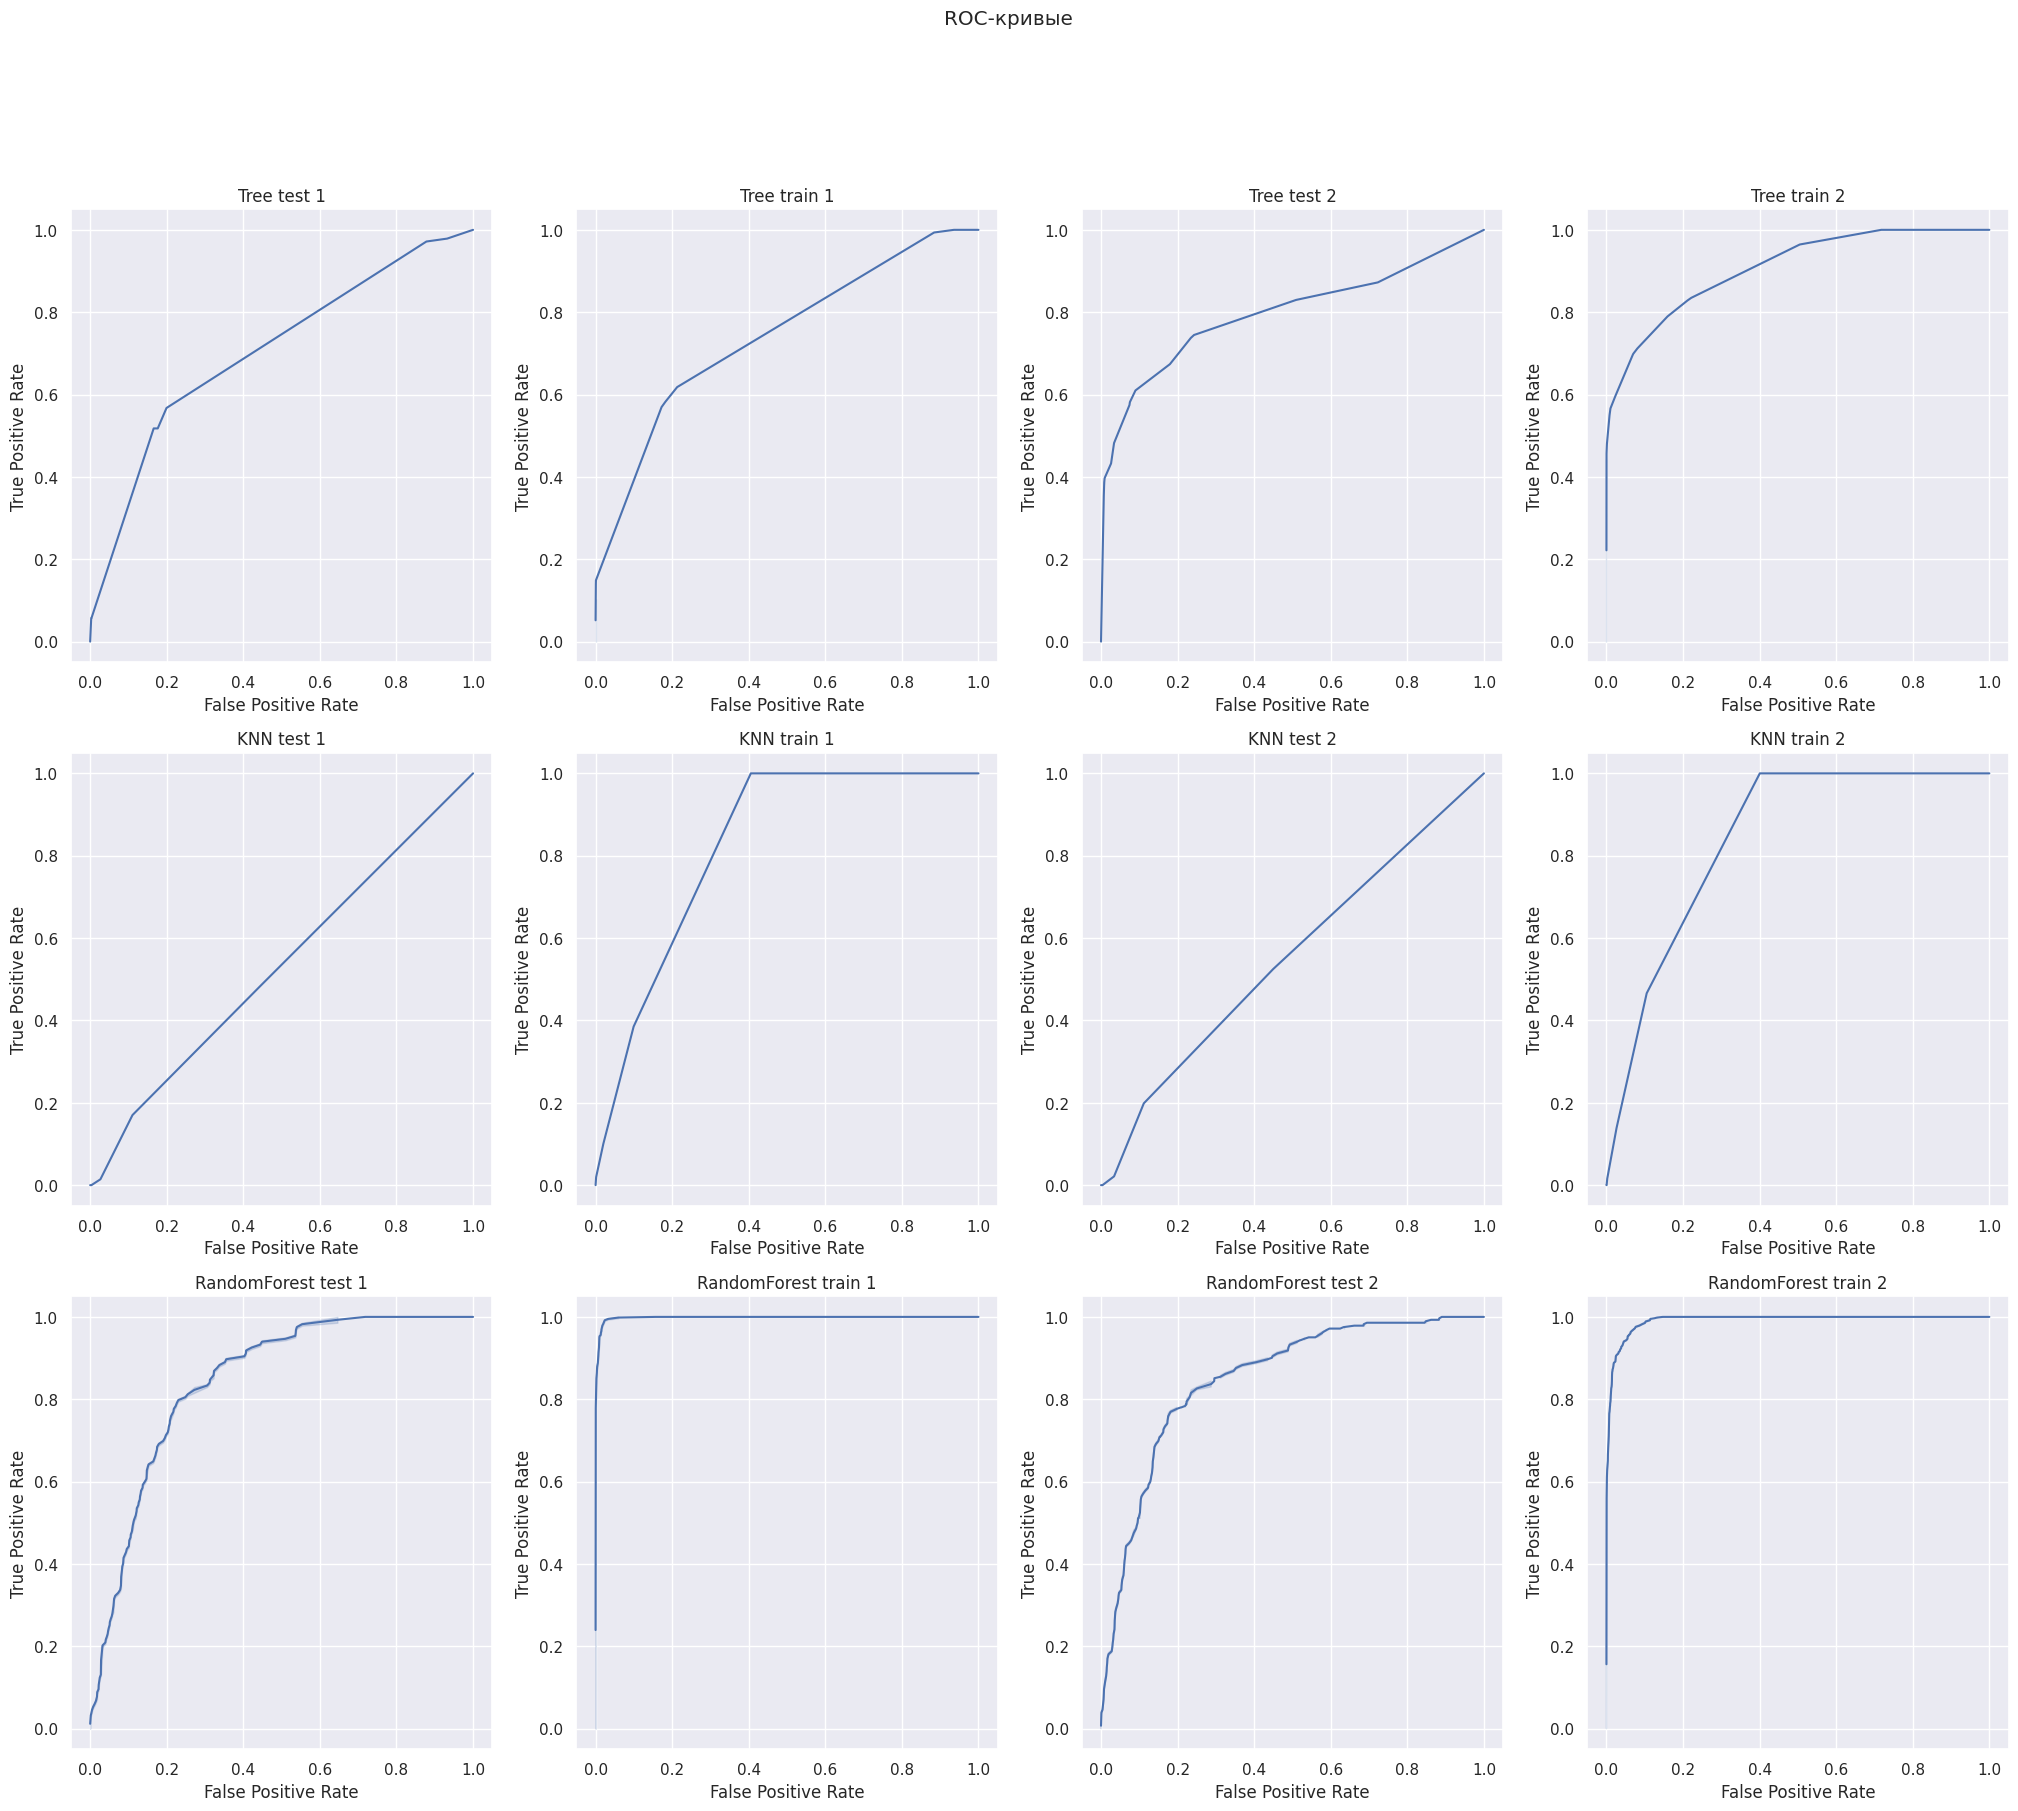

In [ ]:
# y_pred_proba = tr1. predict_proba (X_test_1)[:,1]
a1,b1,_ = roc_curve (y_test, tr1.predict_proba(X_test_1)[:,1])
a2,b2,_ = roc_curve (y_train, tr1.predict_proba(X_train_1)[:,1])

a3,b3,_ = roc_curve (y_test, tr2.predict_proba(X_test_2)[:,1])
a4,b4,_ = roc_curve (y_train, tr2.predict_proba(X_train_2)[:,1])

a5,b5,_ = roc_curve (y_test, knn1.predict_proba(X_test_1)[:,1])
a6,b6,_ = roc_curve (y_train, knn1.predict_proba(X_train_1)[:,1])

a7,b7,_ = roc_curve (y_test, knn2.predict_proba(X_test_2)[:,1])
a8,b8,_ = roc_curve (y_train, knn2.predict_proba(X_train_2)[:,1])

a9,b9,_ = roc_curve (y_test, rf1.predict_proba(X_test_1)[:,1])
a10,b10,_ = roc_curve (y_train, rf1.predict_proba(X_train_1)[:,1])

a11,b11,_ = roc_curve (y_test, rf2.predict_proba(X_test_2)[:,1])
a12,b12,_ = roc_curve (y_train, rf2.predict_proba(X_train_2)[:,1])

sns.set(rc={'figure.figsize':(25,20)})
fig, axes = plt.subplots(nrows= 3 , ncols= 4)
plt.suptitle('ROC-кривые')
a = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12]
b = [b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12]
rows = [0,0,0,0,1,1,1,1,2,2,2,2]
cols = [0,1,2,3,0,1,2,3,0,1,2,3]
titles = ['Tree test 1', 'Tree train 1', 'Tree test 2', 'Tree train 2', 'KNN test 1', 'KNN train 1', 'KNN test 2', 'KNN train 2', 'RandomForest test 1', 'RandomForest train 1','RandomForest test 2', 'RandomForest train 2']

for   row, col, i, j, title in zip(rows, cols, a, b, titles):
  roc = sns.lineplot(x=i, y=j, ax=axes[row,col], legend = 'full')
  roc.set_title(title)
  roc.set_xlabel('False Positive Rate')
  roc.set_ylabel('True Positive Rate')

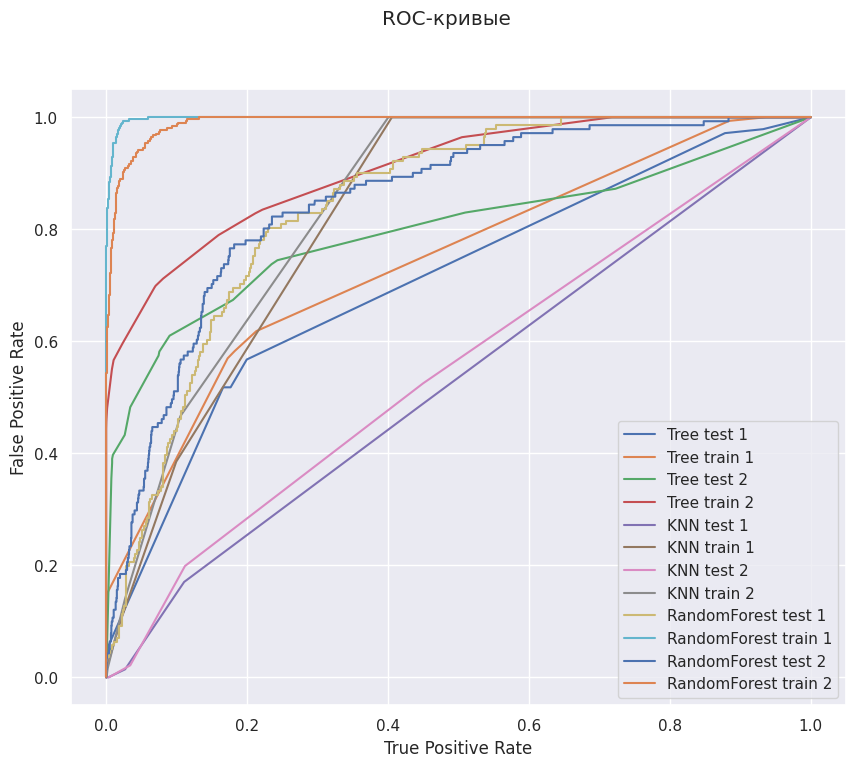

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
plt.suptitle('ROC-кривые')
for   i, j, title in zip( a, b, titles):
  plt.plot(i, j)
  plt.xlabel('True Positive Rate')
  plt.ylabel('False Positive Rate')
  plt.legend(titles)

<p class="task" id="9"></p>

9\. Используя любую из обученных моделей, сделайте предсказания столбца `IsHoliday` для тестового множества и сохраните результат в виде csv файла следующего вида:

```
id,isHoliday
1,0
2,1
...
```

In [ ]:
tr1 = tree.DecisionTreeClassifier(max_depth=5).fit(X_train_1, y_train)

In [ ]:
y_pred_1 = tr1.predict(X_test_1)
result_csv = pd.DataFrame({'id': range(len(y_pred_1)), 'IsHoliday': y_pred_1})
result_csv.head()

,id,IsHoliday
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
result_csv.to_csv('result.csv', index = False)

## Обратная связь
- [ ] Хочу получить обратную связь по решению